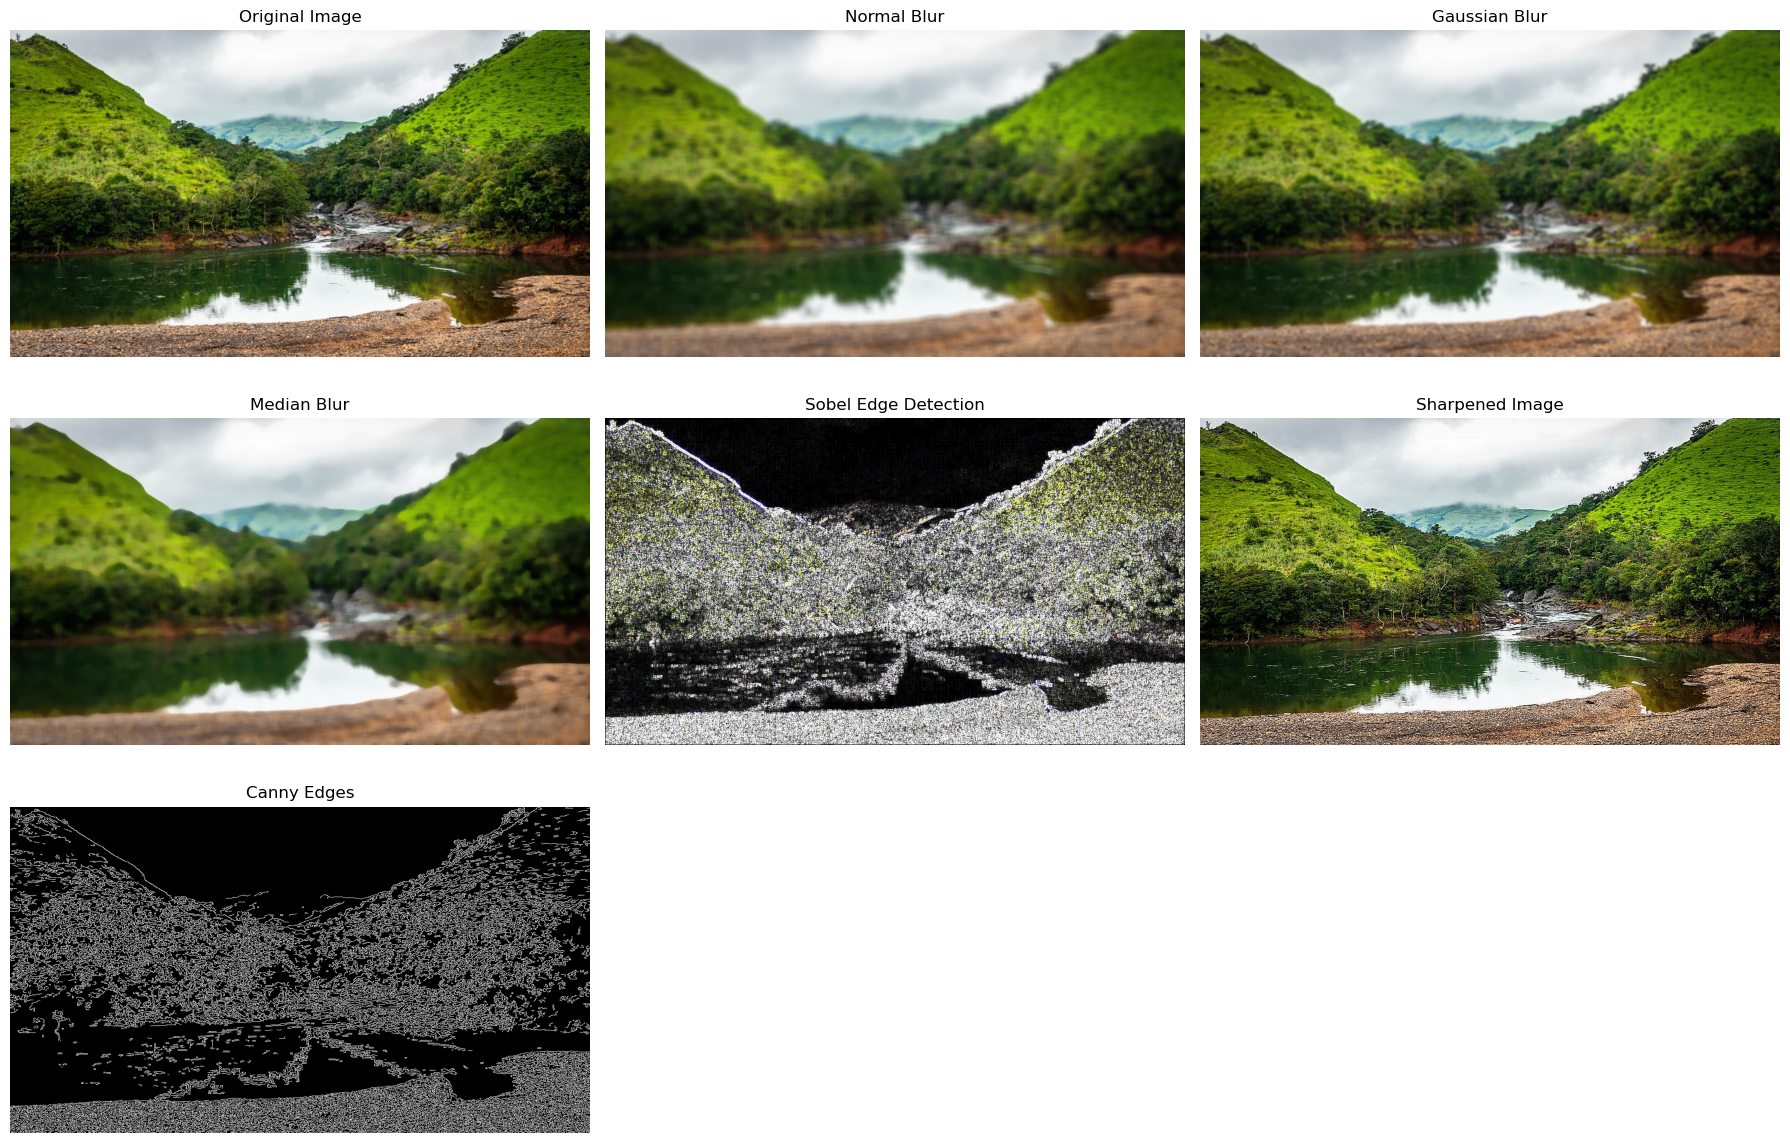

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'sample-image.jpg'  # Change this if needed
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Convert BGR to RGB for matplotlib display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply Normal Blur
    normal_blur = cv2.blur(image, (15, 15))
    normal_blur_rgb = cv2.cvtColor(normal_blur, cv2.COLOR_BGR2RGB)

    # Apply Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)
    gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)

    # Apply Median Blur
    median_blur = cv2.medianBlur(image, 15)
    median_blur_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)

    # Apply Sobel Edge Detection
    sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
    sobel = cv2.convertScaleAbs(sobel)
    sobel_rgb = cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB)

    # Apply Sharpening Filter
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharpen = cv2.filter2D(image, -1, sharpen_kernel)
    sharpen_rgb = cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)

    # Apply Canny Edge Detection
    edges = cv2.Canny(image, 100, 200)

    # Plot all images
    titles = ['Original Image', 'Normal Blur', 'Gaussian Blur', 'Median Blur', 
              'Sobel Edge Detection', 'Sharpened Image', 'Canny Edges']
    images = [image_rgb, normal_blur_rgb, gaussian_blur_rgb, median_blur_rgb,
              sobel_rgb, sharpen_rgb, edges]

    plt.figure(figsize=(18, 12))
    for i in range(len(images)):
        plt.subplot(3, 3, i+1)
        if i == 6:  # Canny edges are grayscale
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
